<a href="https://colab.research.google.com/github/KevinRivas13/Actividades-IA/blob/main/AF6_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **AF6: Aprendizaje supervisado, árbol de decisión**

Grupo:013 Hora:N4-N6

Emiliano Alberto Gomar Valdez 2006043
Kevin Alejandro Rivas Montoya 2015346
Jareth Alejandro Giacoman Vallejo 1758554
Erick Tadeo Hernández Soto 2038847

1. Importar librerías

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np

2. Importar conjunto de datos

In [5]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
print(cancer.target_names)

['malignant' 'benign']


3. Preprocesamiento

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

4. Selección y entrenamiento del modelo

In [7]:
clf = DecisionTreeClassifier(random_state=13)
clf.fit(X_train, y_train)
train_accuracy = clf.score(X_train, y_train)
print(train_accuracy)

1.0


5. Prueba del modelo

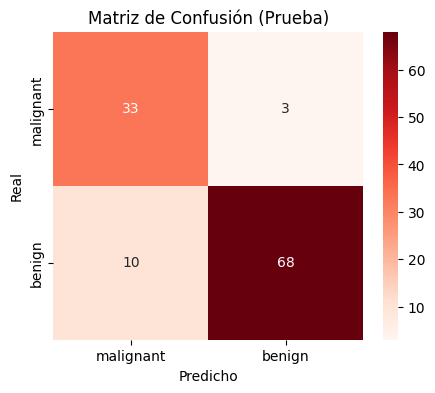

In [15]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión (Prueba)")
plt.show()

In [16]:
# Predicción 1
print("Predicción 1:")
print("y_pred[0] =", y_pred[0])
print("y_test[0] =", y_test[0])
print("Clase predicha:", cancer.target_names[y_pred[0]])
print("Clase real:", cancer.target_names[y_test[0]])
print()

# Predicción 2
print("Predicción 2:")
print("y_pred[10] =", y_pred[10])
print("y_test[10] =", y_test[10])
print("Clase predicha:", cancer.target_names[y_pred[10]])
print("Clase real:", cancer.target_names[y_test[10]])
print()

# Predicción 3
print("Predicción 3:")
print("y_pred[-1] =", y_pred[-1])
print("y_test[-1] =", y_test[-1])
print("Clase predicha:", cancer.target_names[y_pred[-1]])
print("Clase real:", cancer.target_names[y_test[-1]])

Predicción 1:
y_pred[0] = 1
y_test[0] = 0
Clase predicha: benign
Clase real: malignant

Predicción 2:
y_pred[10] = 1
y_test[10] = 1
Clase predicha: benign
Clase real: benign

Predicción 3:
y_pred[-1] = 1
y_test[-1] = 1
Clase predicha: benign
Clase real: benign


In [17]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=cancer.target_names))

Accuracy: 0.8859649122807017

Classification Report:
               precision    recall  f1-score   support

   malignant       0.77      0.92      0.84        36
      benign       0.96      0.87      0.91        78

    accuracy                           0.89       114
   macro avg       0.86      0.89      0.87       114
weighted avg       0.90      0.89      0.89       114



**Visualización del árbol de decisión**

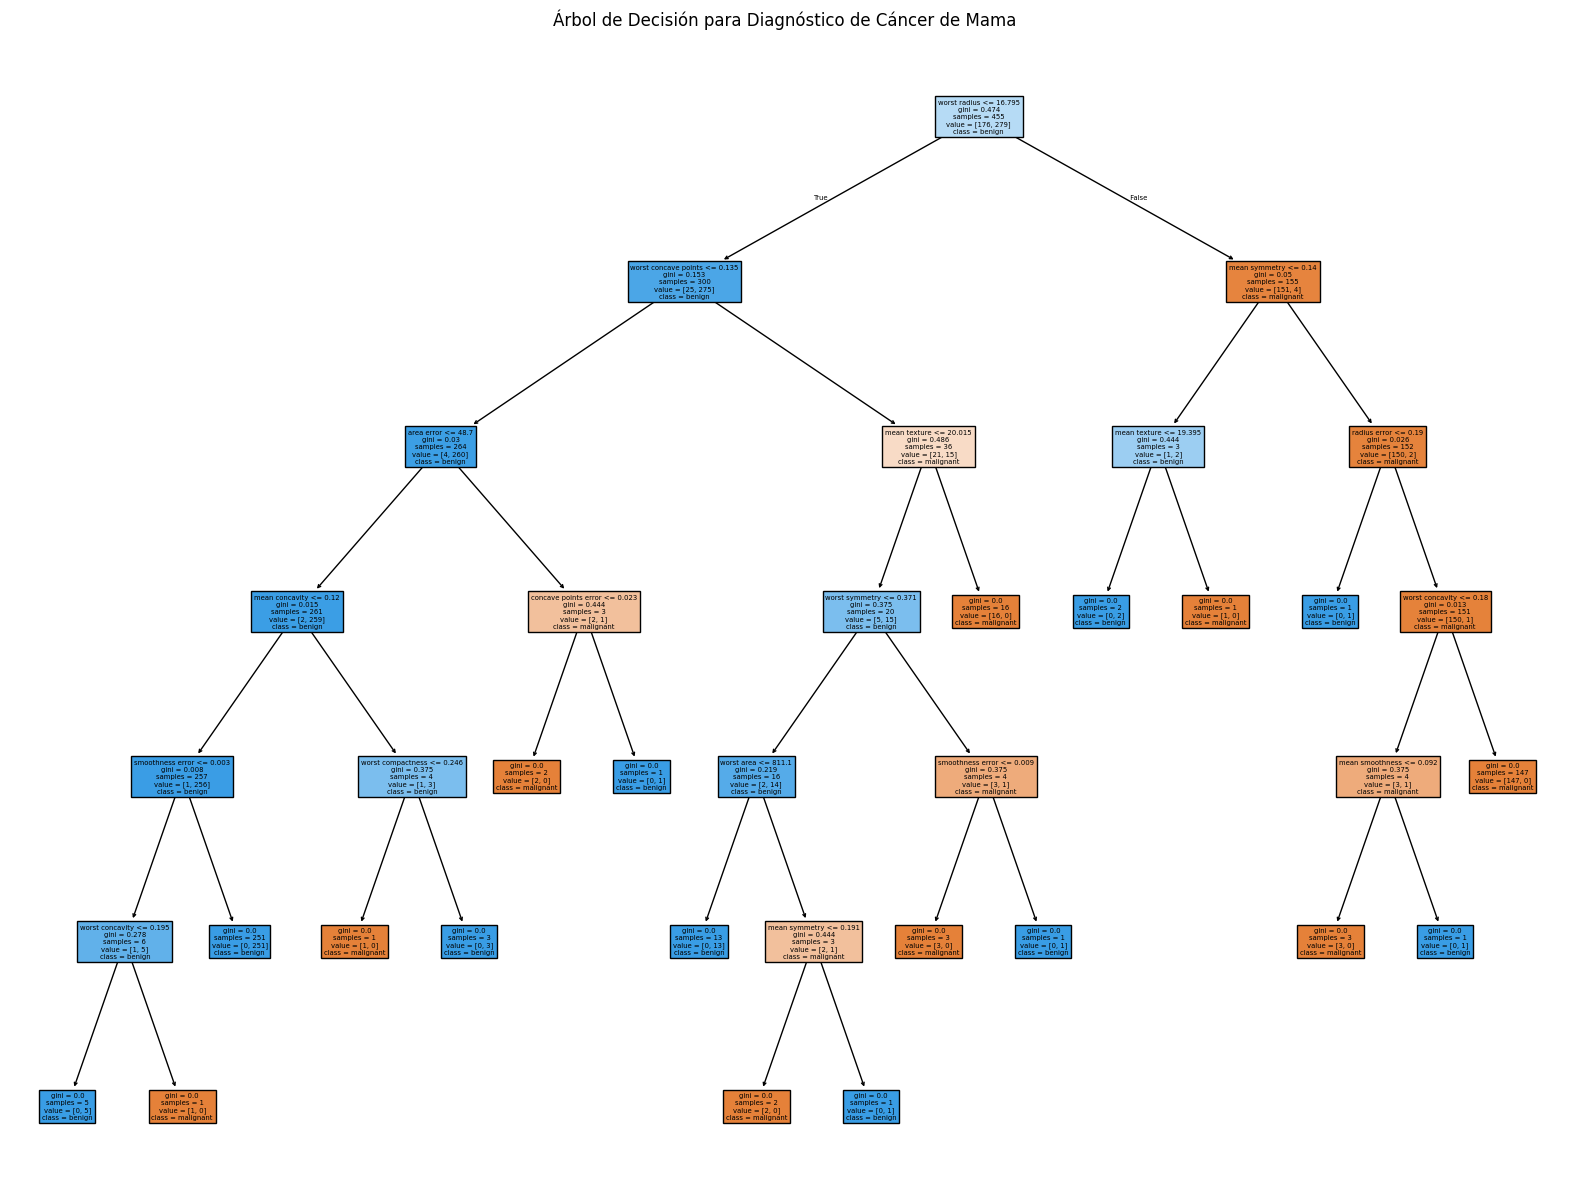

In [18]:
plt.figure(figsize=(20,15))
tree.plot_tree(clf, filled=True, feature_names=cancer.feature_names, class_names=cancer.target_names)
plt.title("Árbol de Decisión para Diagnóstico de Cáncer de Mama")
plt.savefig("decision_tree.png", dpi=300)
plt.show()